In [1]:
import pandas as pd

/var/folders/67/x74mgr8122l6kp90mlcp_vv80000gn/T/ipykernel_9349/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
churn_data = pd.read_csv('/Users/valerialogacheva/Desktop/Skillfactory1/Skillfactory1/My_course/data/churn.csv')

In [3]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:

churn_data.drop(columns = 'RowNumber', inplace = True)


Hеобходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [5]:

import matplotlib.pyplot as plt
import plotly.express as px

exit_counts = churn_data['Exited'].value_counts()
exit_counts_df = exit_counts.to_frame()
exit_counts_df = exit_counts_df.rename(index={1: 'Churn', 0: 'Loyal'})

exit_counts_df['percent'] = round(((exit_counts_df['count']/exit_counts_df['count'].sum()) * 100), 2)
exit_counts_df['percent'] = exit_counts_df['percent'].astype(str) + '%'



In [6]:

fig1 = px.bar(
    data_frame=exit_counts_df,
    labels = {'Exited': 'Статус клиента', 'value':'Количество клиентов'},
    text ='percent',
    color=['blue', 'orange'],
    title='Cоотношение ушедших и лояльных клиентов' 
)
                                

fig1.show();
    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [7]:
import plotly.graph_objects as go
import plotly.io as pio

In [8]:

pio.write_image(fig1, "Fig1.png")


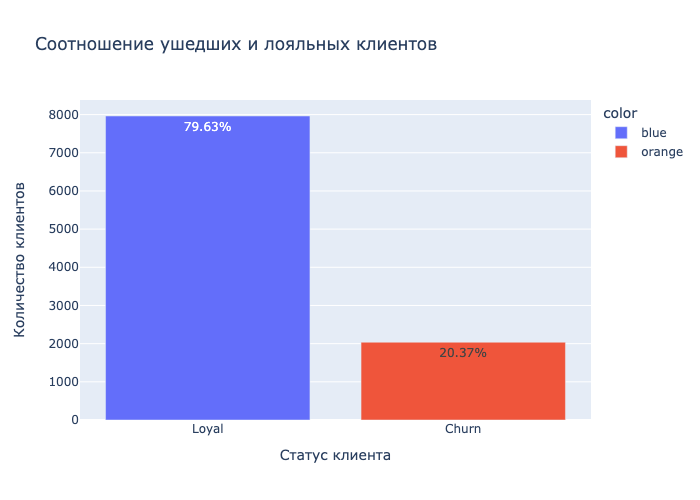

In [9]:
from IPython.display import Image

Image(filename='Fig1.png')

На графике видно, что отток клиентов составлает примерно одну пятую (примерно 20%) от общего числа клиентов. 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [12]:
filtered_data = churn_data[churn_data['Balance'] > 2500]


fig2 = px.histogram(filtered_data, x='Balance', nbins=30,
                   labels={'Balance': 'Баланс ($)', 'count': 'Число клиентов'},
                   title='Распределение баланса пользователей с балансом > $2,500',
                   height=500, 
                   width=700           
                   )

fig2.update_yaxes(title_text='Число клиентов') #почему-то параметр 'лейбл' не переименовывает название оси игрик 

fig2.show()

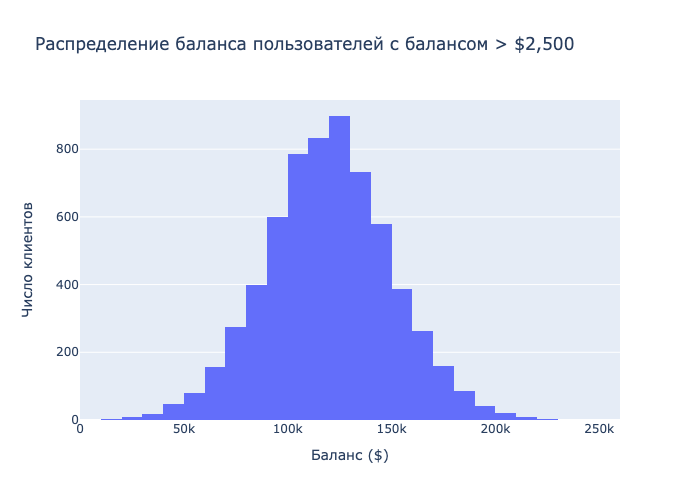

In [14]:
pio.write_image(fig2, "Fig2.png")
Image(filename='Fig2.png')


Из гистораммы видно, что среди пользователей, у которых на счету больше 2 500 долларов, больше всего клиентов имеют на счету от 100 до 140 тысяч долларов. Возможно, банк имеет самые привлекательные условия именно для людей с таким балансом, и менее выгодные для людей с балансом меньше. Тот факт что после 130 тысяч количество клиентов снижается скорее всего говорит только о том, что людей с таким балансом на счету в мире просто меньше.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [15]:

churn_data['Exited'] = churn_data['Exited'].astype(str)
fig3 = px.box(churn_data, x = 'Balance', color='Exited', color_discrete_map={'0': 'blue', '1': 'red'}, labels = {'1':'Churn', '0':'Loyal'}, title="Распределение баланса клиента в разрезе признака оттока")
fig3.show();

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



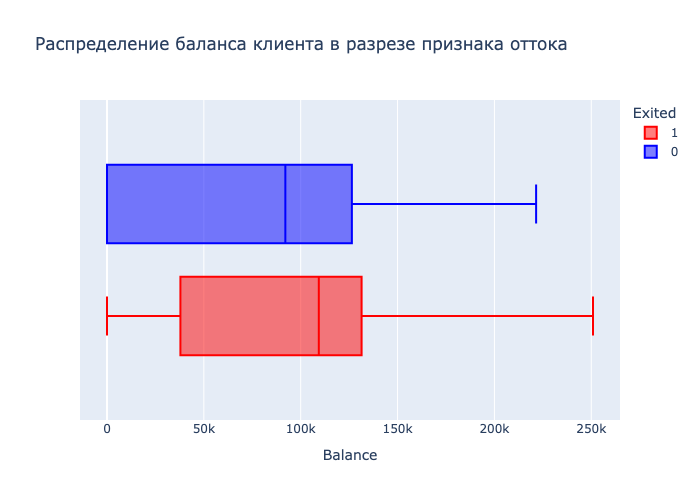

In [16]:
pio.write_image(fig3, "Fig3.png")
Image(filename='Fig3.png')

Среди клиентов банка чей баланс находится в рендже от 100 до 130 тысяч долларов отток наиболее сильный. Возможно этот балансовый рендж представляет людей среднего класса, которым могут быть нужны ипотеки или сругие кредиты/рассрочки. Возможно, основная проблема банка лежит именно здесь — он не предоставляет выгодных условий этим клиентам. Также, если учитивать диаграммы из задания 9.2, где люди с таким балансом представлали наиболее многочисленную группу клиентов банка (ушедшие и оставшиеся), можно предположить, что банк обещает таким клирнтам выгодные условия, но после не выполняет их, что объясняет отток.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [18]:
fig4 = px.box(churn_data, x = 'Age', color='Exited', color_discrete_map={'0': 'blue', '1': 'red'}, title="Распределение возраста клиента в разрезе признака оттока")
fig4.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



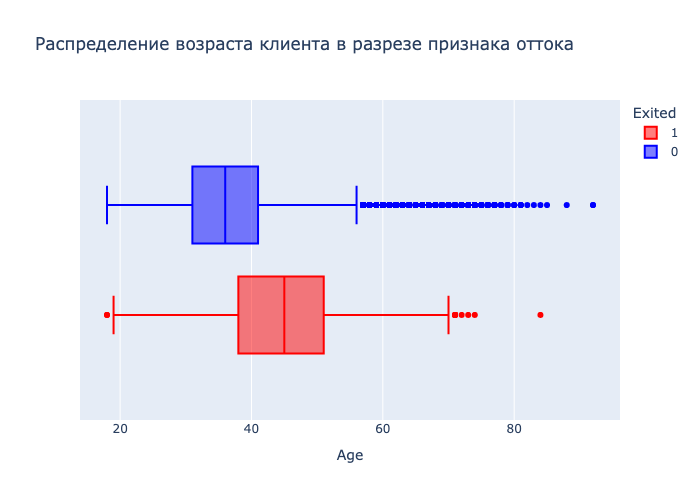

In [19]:
pio.write_image(fig4, "Fig4.png")
Image(filename='Fig4.png')

Среди клиентов, ушедших из банка сильно преобладают люди в возрасте от 38 до 51 года, тогда как большинство оставшихся клиентов значительно моложе — от 31 до 41 года. К тому же, в данных на оставшихся клинетов скорее всего есть большое количество выбросов, так что для дальнейшего исследования эти данные нужно перепроверить. Тем временем банку нужно обратить внимание на людей в возрасте от 38 до 51 года — эта возрастная группа скорее всего находится ня стадии в жизни, где у них уже есть значительные накоюления, и их нужды скорее всего действительно в первую очередь сводятся к ипотекам или другим кредитам/рассрочкам (см. график fig3).



9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


In [20]:


fig5 = px.scatter(churn_data, x='CreditScore', y='EstimatedSalary', color='Exited', color_discrete_map={'0': 'blue', '1': 'red'}, opacity=0.5,
                 title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты',
                 labels={'CreditScore': 'Кредитный рейтинг', 'EstimatedSalary': 'Предполагаемая зарплата', 'Exited': 'Отток клиентов'})

fig5.show();


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



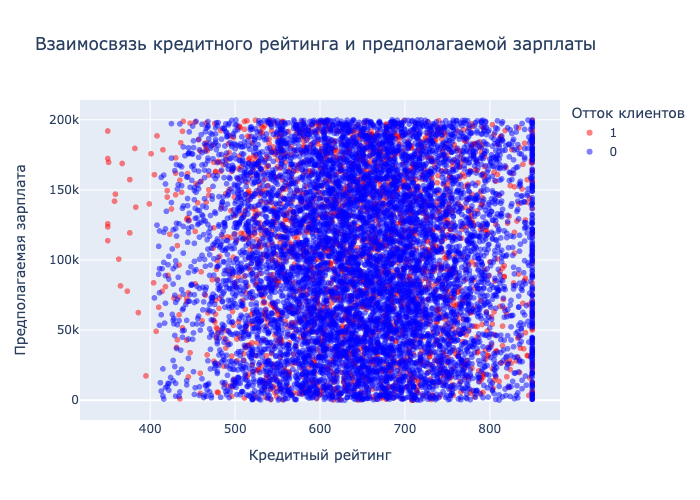

In [21]:
pio.write_image(fig5, "Fig5.png")
Image(filename='Fig5.png')

*Не понимаю, как сделать так, чтобы все точки были видны на графике. 

Все же на графике видно, что нет значительной взаимосвязи между предполагаемой з/п клиентов и их кредитным рейтингом. Хотя видно, что самый низкий кредитный рейтинг (ниже 400) — у клиентов, покинувших банк.



9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [22]:
fig6 = px.pie(churn_data, names='Gender', values="Exited", color='Gender',  title='Взаимосвязь ухода клиентов и гендера',
                 labels={'CreditScore': 'Кредитный рейтинг', 'EstimatedSalary': 'Предполагаемая зарплата', 'Exited': 'Отток клиентов'})

fig6.show()


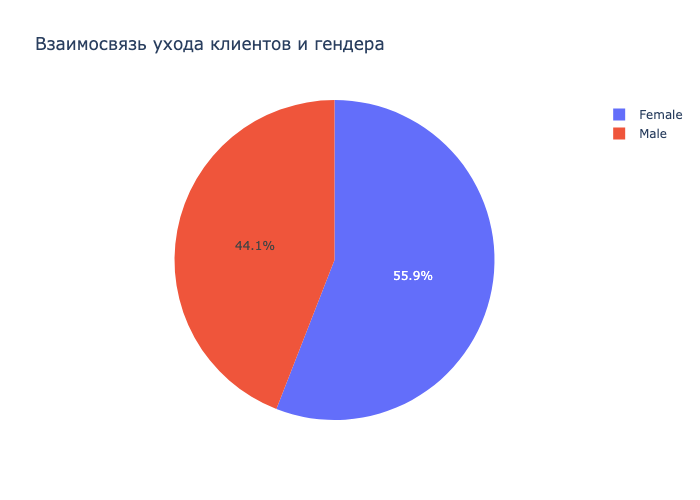

In [23]:
pio.write_image(fig6, "Fig6.png")
Image(filename='Fig6.png')

С разницей в примерно 10% среди ушедших клиентов преобладают женщины.


9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [24]:
churn_rates = churn_data.groupby("Exited")["NumOfProducts"].value_counts()
churn_rates = churn_rates.reset_index()
fig7 = px.bar(churn_rates, x = "NumOfProducts", y = 'count', color = 'Exited')
fig7.show();




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



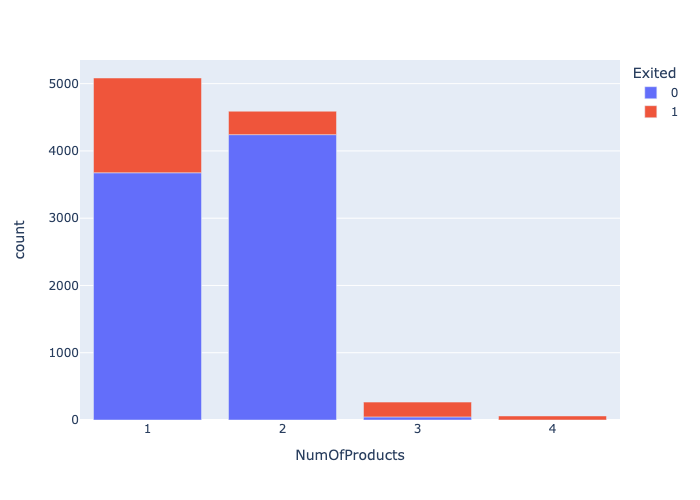

In [25]:
pio.write_image(fig7, "Fig7.png")
Image(filename='Fig7.png')

Из диаграммы видно, что большинство ушедших клиентов имели в банке только один продукт. Но мне кажется более удобным для демонстрации этой взаимосвязи построить пай-чарт по данным только ушедших клиентов. На диаграмме ниже (fig7_pie) отчетливо видно, что среди ушедших клиентов почти 70% имели только один банковский продукт.

In [26]:

mask = (churn_rates['Exited'] == '1')
table_churn = churn_rates[mask]
fig7_pie = px.pie(table_churn, names='NumOfProducts', values='count', color='NumOfProducts',  title='Взаимосвязь ухода клиентов и number of products')
fig7_pie.show()


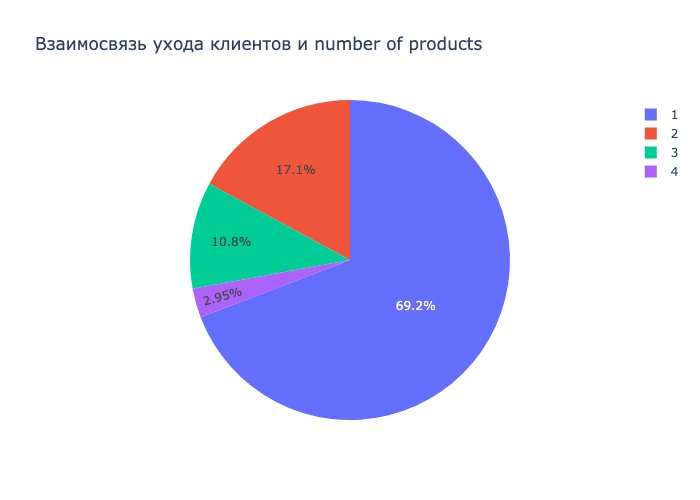

In [27]:
pio.write_image(fig7_pie, "Fig7_pie.png")
Image(filename='Fig7_pie.png')

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [28]:


churn_status = churn_data.groupby("Exited")["IsActiveMember"].value_counts()
churn_status = churn_status.reset_index()
mask = (churn_status["Exited"] == '1')
churn_status_graph = churn_status[mask]


fig8 = px.pie(churn_status_graph, names='IsActiveMember', values='count', color='IsActiveMember', color_discrete_map={'1': 'blue', '0': 'red'}, title='Статус ушедших клиентов')
fig8.show()



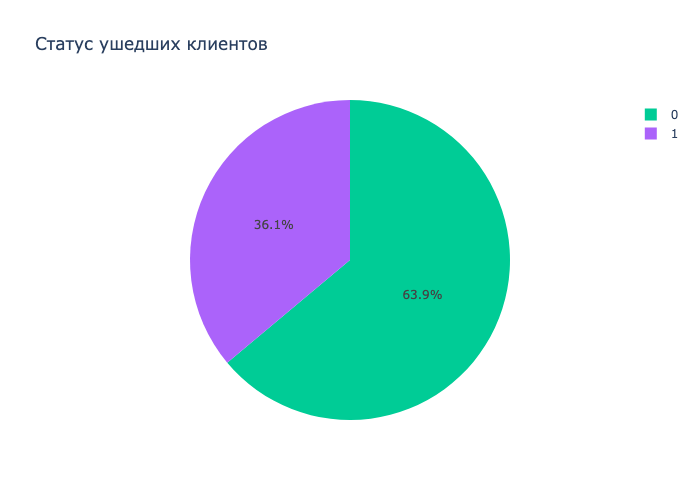

In [29]:
pio.write_image(fig8, "Fig8.png")
Image(filename='Fig8.png')

Среди ушедших клиентов более 60% обладают неактивным статусом. Возможно имеет смысл разработать бонусные программы или программы с выгодными условиями для клиентов с неактивным статусом.


9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [30]:
mask = (churn_data['Exited'] == '1')
choropleth_data = churn_data[mask].groupby(by = "Geography", as_index = False)[["Exited"]].value_counts()
fig9 = px.choropleth(choropleth_data, locations = "Geography", locationmode = "country names", range_color = [0, 814], color_continuous_scale='Reds', color="count")
fig9.show()


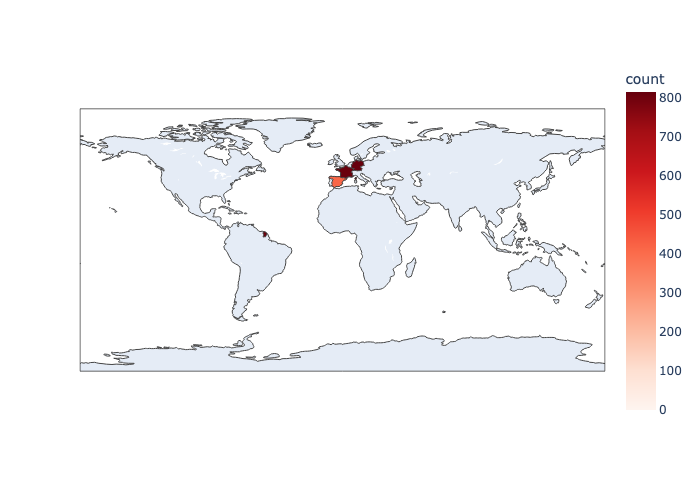

In [31]:
pio.write_image(fig9, "Fig9.png")
Image(filename='Fig9.png')

Болше всего ушедших клиентов в Германии, с незначительным отрывом от Франции. Возможно, банку стоит пересмотреть те программы, которые есть у них в Германии. Либо эти программы отличаются от другох, либо у неметского банковского пользователя запросы и ожидания от банковских услуг отличаются от другох стран, и банку нужно разработать программы специфичные для потребностей немецкого потребителя. 

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [32]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


churn_data["CreditScoreCat"] = churn_data['CreditScore'].apply(get_credit_score_cat)
display(churn_data.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

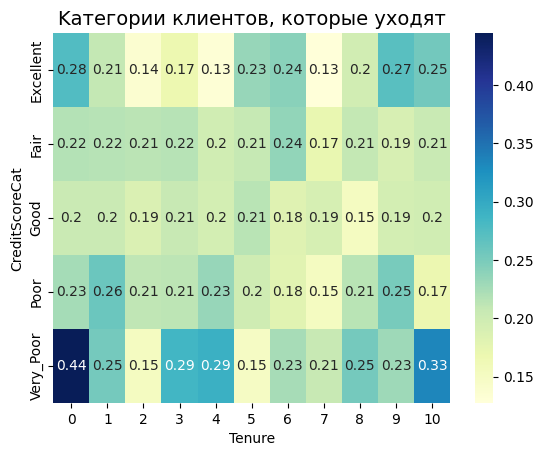

In [33]:
churn_data['Exited'] = churn_data['Exited'].astype(int)
churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack()
fig_data = churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack()

import seaborn as sns

fig10 = sns.heatmap(data=fig_data, cmap='YlGnBu', annot = fig_data)
fig10.set_title('Kатегории клиентов, которые уходят', fontsize=14);

На карте видно, что больше всего клиентов, ушедших из банка, имеют самый плохой кредитный рейтинг и пользовались услугами банка менее 1 года, но также большое количество ушедших клиентов с низким рейтингом провели с банком около 10 лет, либо 3-4 года. Далее ушедшие клиенты представлены людьми с самым лучшим кредитным рейтингом, и вновь максимальное количество этих людей — среди клиентов, которые пользовались услугами банка менее 1 года, а затем среди людей, которые были с банком около 10 лет. 

